本节介绍了**模型误差,观测误差,截断误差,方法误差,舍入误差,病态问题,条件数,数值稳定性**.
详情见[《现代数值分析》 一、引论](https://www.jianshu.com/p/4d57905d401e)

本文用到python的sympy库进行符号运算，
未安装的同学可以使用
```
pip install sympy
```
进行安装.关于sympy教程可以自行搜索,这里给出一份[文档](https://docs.sympy.org/latest/index.html).
[这个更加实用](https://geek-docs.com/python/python-tutorial/python-sympy.html)
常用命令直接看本文代码应当也不难理解.

原创内容,如需转载需征得作者同意。

Copyright©2009 lizhemin

In [1]:
#内置符号说明
import sympy as sp
#虚数单位
print(sp.I**2)
#科学常数
print(sp.E)
#无穷大
print(1/sp.oo)
#pi
print(sp.pi)

-1
E
0
pi


In [11]:
#常用运算
#开方
print(sp.sqrt(-1))
#对数运算,写一项时默认以e为基地
print(sp.log(1000,10))
#开根号
print(sp.root(8,3))
#阶乘
print(sp.factorial(10))
#三角函数,此处以sin为例
print(sp.sin(sp.pi))

I
3
2
3628800
0


In [16]:
#表达式与表达式求值
import numpy as np
x = sp.Symbol('x')
fx = 2*x+1
print(fx.evalf(subs={x:2}))
#导入多个
i,j = sp.symbols('i j')
gx = i+j
sp.pprint(gx.evalf(subs={i:1,j:2}))
#从sympy.abc导入
from sympy.abc import x,y
hx = x/y
sp.pprint(hx.evalf(subs={x:1,y:2}))

5.00000000000000
3.00000000000000
0.500000000000000


In [11]:
#一个小例子说明符号运算的好处
r = sp.Rational(1/10)
val = 3*r
sp.pprint(val.evalf())
sp.pprint(1/10*3)
#pprint可用于美化输出，类似于latex的输出,某些字符maybe需要unicode编码支持
sp.init_printing(use_unicode=True)
x = sp.Symbol('x')
c = (sp.exp(x)**2+1/x)
print(c)
sp.pprint(c)

0.300000000000000
0.30000000000000004
exp(2*x) + 1/x
 2⋅x   1
ℯ    + ─
       x


In [22]:
#表达式操作
#自动规范表达式
from sympy.abc import a, b
expr = b*a + -4*a + b + a*b + 4*a + (a + b)*3
sp.pprint(expr)
#展开表达式
expr = (x + 1) ** 2
sp.pprint(sp.expand(expr))
#简化表达式
expr = sp.sin(x)/sp.cos(x)
sp.pprint(sp.simplify(expr))
#比较表达式
a = sp.cos(x)**2 - sp.sin(x)**2
b = sp.cos(2*x)
print(a.equals(b))


2⋅a⋅b + 3⋅a + 4⋅b
 2          
x  + 2⋅x + 1
tan(x)
True


In [37]:
#通过替换值来求表达式
from sympy.abc import a, b
expr = b*a + -4*a + b + a*b + 4*a + (a + b)*3
sp.pprint(expr.subs([(a, 3), (b, 2)]))
#求解方程
x = sp.Symbol('x')
sol = sp.solve(x**2 - x, x)
print(sol)
#或者写成公式的形式
eq1 = sp.Eq(x + 1, 4)
sp.pprint(eq1)
sol = sp.solve(eq1, x)
print(sol)
#给定区间的解
sol = sp.solveset(x**2 - 1, x, sp.Interval(0, 100))
print(sol)

29
[0, 1]
<class 'list'>
x + 1 = 4
[3]
{1}


In [39]:
#序列
from sympy.abc import x
s = sp.sequence(x, (x, 1, 10))
print(s)
sp.pprint(s)
print(list(s))

print(s.length)
print(s.start)
print(sp.summation(s.formula, (x, s.start, s.stop)))

SeqFormula(x, (x, 1, 10))
[1, 2, 3, 4, …]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10
1
55


In [41]:
from sympy.abc import x

l1 = sp.limit(1/x, x, sp.oo)
print(l1)

l2 = sp.limit(1/x, x, 0)
print(l2)

0
oo


In [44]:
#矩阵运算
M = sp.Matrix([[1, 2], [3, 4], [0, 3]])
print(M)
sp.pprint(M)

N = sp.Matrix([2, 2])

print("---------------------------")
print("M * N")
print("---------------------------")

sp.pprint(M*N)

Matrix([[1, 2], [3, 4], [0, 3]])
⎡1  2⎤
⎢    ⎥
⎢3  4⎥
⎢    ⎥
⎣0  3⎦
---------------------------
M * N
---------------------------
⎡6 ⎤
⎢  ⎥
⎢14⎥
⎢  ⎥
⎣6 ⎦


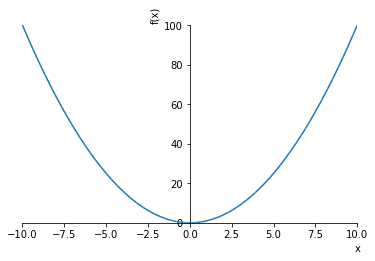

In [46]:
#画图
from sympy.abc import x
from sympy.plotting import plot

plot(x**2)

1. 设$f(x)=\ln x$,利用$f$在$x_0=e$的泰勒展开式计算$\ln 3$的近似值,使误差不超过$10^{-4}$.

In [73]:
import sympy as sp
def taylor(func,num_terms=3,point=0):
    sums = 0
    for i in range(num_terms):
        numerator = func.diff(x,i)
        numerator = numerator.evalf(subs={x:point})
        denominator = np.math.factorial(i)
        sums += numerator/denominator*(x-point)**i
    return sp.simplify(sums)
x = sp.Symbol('x')
exp = sp.log(x)
i = 1
real = np.log(3)
error = 10000
while error>1e-3:
    exp_tay = taylor(exp,num_terms=i,point=np.exp(1))
    print('展开到',i-1,'项，表达式为')
    sp.pprint(exp_tay)
    result = exp_tay.evalf(subs={x:3})
    error = np.abs(result - real)
    i += 1
    print('第',i-1,'项误差为',error)
    

展开到 0 项，表达式为
1.00000000000000
第 1 项误差为 0.0986122886681102
展开到 1 项，表达式为
0.367879441171442⋅x - 2.22044604925031e-16
第 2 项误差为 0.00502603484621700
展开到 2 项，表达式为
                      2                            
- 0.0676676416183064⋅x  + 0.735758882342885⋅x - 0.5
第 3 项误差为 0.000344416204212772


2.设$y_0=28$，按递推公式
$$
y_n = y_{n-1} - \frac{1}{100} \sqrt{783},n=1,2,\ldots
$$
计算到$y_{100}$,若取$\sqrt{783}\approx 27.982$，试问计算$y_{100}$将有多大误差？

In [75]:
#没有get到point
import numpy as np
q = 27.982
y=28
for i in range(1,101):
   y = y-q/100
print(y)

0.017999999999941063


3.已知$P(x)=(x-10)^4+0.200(x-10)^3+0.0500(x-10)^2-0.00500(x-10)+0.00100$,用秦九韶法计算$P(10.11)$，计算用3位有效数字。

In [104]:
import numpy
import sympy as sp
def shao_expand(func,num_terms=3,point=0):
    sums = []
    for i in range(num_terms):
        numerator = func.diff(x,i)
        numerator = numerator.evalf(subs={x:point})
        denominator = np.math.factorial(i)
        sums.append(numerator/denominator)
    return sums
def shao_cal(in_x,sums,point):
    lenth = len(sums)
    result = sums[lenth-1]
    result = np.around(result,decimals=3)
    for i in range(1,lenth):
        result = result*(in_x-point) +sums[lenth-i-1]
        result = np.around(result,decimals=3)
    return result
x = sp.Symbol('x')
px = (x)**4 + 0.2*(x)**3 +0.05*(x)**2 -0.005*(x) +0.001
coef = shao_expand(px,num_terms = 5,point=0)
coef = np.array(coef,dtype='float32')
print('泰勒展开从高到低的系数依次为',coef)
print('秦九韶，保留三位算出值：',shao_cal(in_x=0.11,sums=coef,point=0))
print('高精度计算结果',px.evalf(subs={x:0.11}))
def cp(in_x,func):
    df = func.diff(x,1)
    df = df.evalf(subs={x:in_x})
    f = func.evalf(subs={x:in_x})
    return np.abs(df*in_x/f)

print('条件数为',cp(0.11,px))

泰勒展开从高到低的系数依次为 [ 0.001 -0.005  0.05   0.2    1.   ]
秦九韶，保留三位算出值： 0.001
高精度计算结果 0.00146761000000000
条件数为 1.39290410940236


4.上题$P(x)$的一个近似值为
$$
x^4-39.8x^3+594.05*x^2-3941*x+9805.05
$$
用秦九韶算法求$Q(10.11)$，并求此问题条件数$c_p$.
**注：**条件数计算公式$c_p=\left|\frac{f'(x)\cdot x}{f(x)}\right|$

In [103]:
import numpy as np
import sympy as sp
def shao_expand(func,num_terms=3,point=0):
    sums = []
    for i in range(num_terms):
        numerator = func.diff(x,i)
        numerator = numerator.evalf(subs={x:point})
        denominator = np.math.factorial(i)
        sums.append(numerator/denominator)
    return sums
def shao_cal(in_x,sums,point):
    lenth = len(sums)
    result = sums[lenth-1]
    result = np.around(result,decimals=3)
    for i in range(1,lenth):
        result = result*(in_x-point) +sums[lenth-i-1]
        result = np.around(result,decimals=3)
    return result
x = sp.Symbol('x')
px = (x-10)**4 + 0.2*(x-10)**3 +0.05*(x-10)**2 -0.005*(x-10) +0.001
coef = shao_expand(px,num_terms = 5,point=0)
coef = np.array(coef,dtype='float32')
print('泰勒展开从高到低的系数依次为',coef)
print('秦九韶，保留三位算出值：',shao_cal(in_x=10.11,sums=coef,point=0))
print('高精度计算结果',px.evalf(subs={x:10.11}))

def cp(in_x,func):
    df = func.diff(x,1)
    df = df.evalf(subs={x:in_x})
    f = func.evalf(subs={x:in_x})
    return np.abs(df*in_x/f)

print('条件数为',cp(10.11,px))
    

泰勒展开从高到低的系数依次为 [ 9.805051e+03 -3.941005e+03  5.940500e+02 -3.980000e+01  1.000000e+00]
秦九韶，保留三位算出值： -0.011
高精度计算结果 0.00146760999999999
条件数为 128.020550418708


5.设$f(x)=\ln\left(x-\sqrt{x^2-1}\right)$，它等价于$f(x)=-\ln\left(x+\sqrt{x^2-1}\right)$,分别计算$f(30)$,开方和对数取6位有效数字。试问哪个公式计算结果可靠？为什么？

In [164]:
import numpy as np
def eff(num,n):
    num = str(num)
    if 'e' in num:
        e_index = num.index('e')
        pre = num[0:e_index]
        fix = num[e_index:]
        #print(fix)
    else:
        pre = num
        fix = ''
    n_eff = 0
    pre_new = ''
    for i in range(len(pre)):
        pre_new += pre[i]
        if pre[i] not in ['-','.','0']:
            n_eff += 1
        if n_eff == n:
            break
    return float(pre_new + fix)
x = 30
fx = np.sqrt(x**2-1)
fx = eff(fx,6)
fx = np.log(x-fx)
fx = eff(fx,6)
print('第一个公式计算结果：',fx)
gx = np.sqrt(x**2-1)
gx = eff(gx,6)
gx = np.log(x+gx)
gx = -eff(gx,6)
print('第二个公式计算结果：',gx)
print('第二个更可靠，因为避免了相近的数相减，高精度计算结果为：')
print(np.log(x-np.sqrt(x**2-1)))

第一个公式计算结果： -4.092346
第二个公式计算结果： -4.0940661
第二个更可靠，因为避免了相近的数相减，高精度计算结果为：
-4.094066668632055


6.求方程$x^2+62x+1=0$的两个根，使它们具有4位有效数字。

In [150]:
import sympy as sp
x = sp.Symbol('x')
sol = sp.solve(x**2 +62*x+1, x)
print('真解为',sol)
print('浮点数表示为',float(sol[0]),float(sol[1]))
a = 1
b = 62
c = 1
print('此时b^2>>4ac，那么直接使用求根公式会出现算法不稳定，应当使用根与系数关系求解')
x1 = (-b-np.sqrt(b**2-4*a*c))/2/a
print('使用(-b+\sqrt{b^2-4ac})/2a求得x1:',x1)
print('用x1+x2=-b/a得,x2:',-b/a-x1)
print('用x1*x2=c/a得,x2:',c/a/x1)

真解为 [-31 - 8*sqrt(15), -31 + 8*sqrt(15)]
浮点数表示为 -61.983866769659336 -0.01613323034066492
此时b^2>>4ac，那么直接使用求根公式会出现算法不稳定，应当使用根与系数关系求解
使用(-b+\sqrt{b^2-4ac})/2a求得x1: -61.983866769659336
用x1+x2=-b/a得,x2: -0.01613323034066383
用x1*x2=c/a得,x2: -0.01613323034066492


7.计算下列式子，要求具有4位有效数字：
(1)$\sqrt{101.1}-\sqrt{101}$
(2)$1-\cos\frac{1}{\pi}$

**分析**：二者都是要避免相近数相减，可以进行一些数学变换避免：

(1)
$$
\sqrt{101.1}-\sqrt{101}=\frac{\sqrt{101.1}+\sqrt{101}}{0.1}
$$

(2)
$$
1-\cos\frac{1}{\pi}=2\sin^2\frac{1}{2*\pi}
$$


8.序列$\left\{(\frac{1}{3})^\pi\right\}_0^\infty$可由下列两种递推公式生成：

(1)$x_0=1,x_\pi=\frac{1}{3}x_{n-1},n=1,2,\ldots$


(2)$y_0=1,y_1=\frac{1}{3},y_n=\frac{5}{3}y_{n-1}-\frac{4}{9}y_{n-2},n=2,3,\ldots$(原文递推公式有误，已修改)

采用5位有效数字舍入运算，试分别考察递推计算$\{x_n\}$与$\{y_n\}$是否稳定。

In [2]:
import numpy as np
def eff(num,n):
    num = str(num)
    if 'e' in num:
        e_index = num.index('e')
        pre = num[0:e_index]
        fix = num[e_index:]
        #print(fix)
    else:
        pre = num
        fix = ''
    n_eff = 0
    pre_new = ''
    for i in range(len(pre)):
        pre_new += pre[i]
        if pre[i] not in ['-','.','0']:
            n_eff += 1
        if n_eff == n:
            break
    return float(pre_new + fix)
x = 1
z = 1
y = np.array([1,1/3])
item =10
for i in range(item):
    x = eff(x/3,5)
    y0 = y[0]
    y1 = y[1]
    y[0] = eff(y1,5)
    y[1] = eff(5/3*y1-4/9*y0,5)
    z = z/3
    print('x:',x,'y:',y[0],'real',z)

x: 0.33333 y: 0.33333 real 0.3333333333333333
x: 0.11111 y: 0.11111 real 0.1111111111111111
x: 0.0370366 y: 0.0370366 real 0.037037037037037035
x: 0.012345 y: 0.012345 real 0.012345679012345678
x: 0.004115 y: 0.0041142 real 0.004115226337448559
x: 0.0013716 y: 0.00137033 real 0.0013717421124828531
x: 0.0004572 y: 0.00045534 real 0.0004572473708276177
x: 0.0001524 y: 0.00014986 real 0.00015241579027587258
x: 5.07999e-05 y: 4.7393e-05 real 5.0805263425290864e-05
x: 1.6933e-05 y: 1.2383e-05 real 1.693508780843029e-05
